## Code Reference
This Notebook is code was taken from : https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/ and was adapted to illustrate the behavior of SEIR using different naming conventions and parameter values to show a range of examples. (last accessed 2023-12-05).

Illustrating the behavior of SEIR system of differential equations to get an overview of compartment sizes with respect to time and the dynamics of compartmental models. 

In [40]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams.update({'font.size': 13})

In [41]:
plt.rc('font', size=18)         
plt.rc('axes', titlesize=15)     
plt.rc('axes', labelsize=17)    
plt.rc('xtick', labelsize=13)    
plt.rc('ytick', labelsize=13)    
plt.rc('legend', fontsize=15,markerscale=3.)   
plt.rc('figure', titlesize=13)


Define SEIR system of differential equations.

In [42]:
def seir(c, t, pi, pr, ps): 
    S, E, I, R = c
    dSdt = (-pi * S * I) + (-pi * S * E) # The change in susceptible population over time
    dEdt = (pi * S * I) + (pi * S * E) - (ps * E) # The change in exposed population over time
    dIdt = (ps * E) - (pr * I) # The change in infected population over time
    dRdt = pr * I # The change in removed population over time
    return [dSdt, dEdt, dIdt, dRdt]

Define SIR system of differential equations

In [43]:
def sir(c, t, pi, pr): 
    S, I, R = c
    dSdt = -pi * S * I # The change in susceptible population over time.
    dIdt = (pi * S * I) - (pr * I) # The change in infected population over time.
    dRdt = pr * I # The change in recovered population over time.
    return [dSdt, dIdt, dRdt]

Setup the compartment sizes.

In [44]:
# Size of Initial Compartments
E0 = 0.01 # 1% of the population is initially exposed
S0 = 1 - E0 # 99% of the population is susceptible
I0 = 0 # No one is infected
R0 = 0 # No one is removed

# Create compartments
C0 = [S0, E0, I0, R0] 

Set rates p_remove and p_infect and p_symptoms to control rate of recovery, onset of symptoms and transmission respectively.

The rate of p_symptoms and p_remove are set to be the same to illustrate the effect of an additional compartment on the behaviour of the system where infected individuals develop symptoms at the same rate they recover.

In [45]:
p_remove = 0.05
p_infect = 0.08 
p_symptoms = 0.05 

 Solve the SEIR differential equations from time 0 to 500

In [46]:
t_max = 500
t = np.arange(0, t_max)

# Solve ODE (Ordinary Differential Equations)
compartments_over_time = odeint(seir, C0, t, args=(p_infect, p_remove, p_symptoms)).T

# Unpack the individual compartment sizes over time
S, E, I, R = compartments_over_time

In [47]:
# Size of Initial Compartments
I0 = 0.01 # 1% of the population is initially infected
S0 = 1 - I0 # 99% of the population is susceptible
R0 = 0 # No one is removed

# Create compartments
C0 = [S0, I0, R0]  

compartments_over_time = odeint(sir, C0, t, args=(p_infect, p_remove)).T

S_, I_, R_ = compartments_over_time

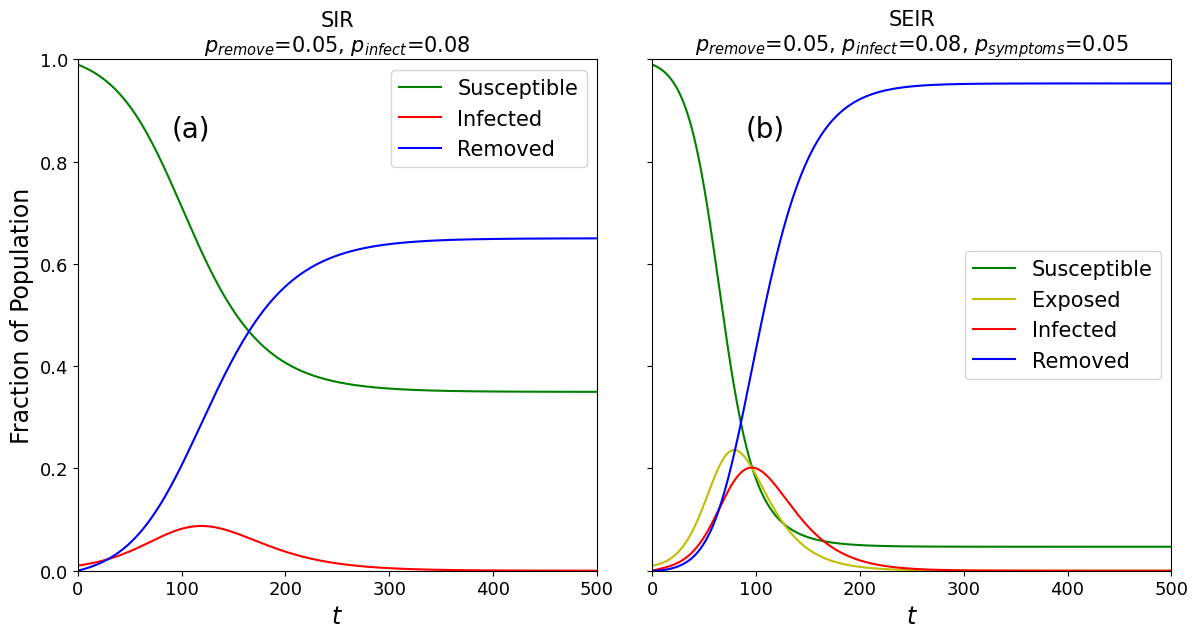

In [48]:
# Plot the data on four separate curves for S(t), E(t), I(t) and R(t).

fig, (ax1, ax2) = plt.subplots(1, 2,  sharex=True, sharey=True, figsize=(12,6))

fig.tight_layout()
    
ax2.plot(t, S, 'g-', label='Susceptible')
ax2.plot(t, E, 'y-', label='Exposed')
ax2.plot(t, I , 'r-', label='Infected')
ax2.plot(t, R, 'b-', label='Removed')



ax2.set_xlim([0, t_max])
ax2.set_ylim([0, 1])
ax2.legend() 
ax2.set_title("SEIR\n$p_{remove}$=" + str(p_remove) + ", $p_{infect}$=" + str(p_infect) +  ", $p_{symptoms}$=" + str(p_symptoms))
ax2.set_xlabel('$t$')



ax1.plot(t, S_, 'g-', label='Susceptible')
ax1.plot(t, I_ , 'r-', label='Infected')
ax1.plot(t, R_, 'b-', label='Removed')


ax1.legend() 
ax1.set_title("SIR\n$p_{remove}$=" + str(p_remove) + ", $p_{infect}$=" + str(p_infect))
ax1.set_xlabel('$t$')
ax1.set_ylabel("Fraction of Population")


ax1.text(90, 0.85, f"(a)", fontsize=20)
ax2.text(90, 0.85, f"(b)", fontsize=20)

fig.show()